<a href="https://colab.research.google.com/github/ShubhInfotech-Bhilai/AI-ML-DL-NN/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
# For easy reset of notebook state.
tf.keras.backend.clear_session() 

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


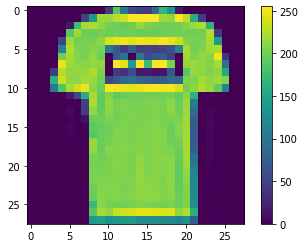

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

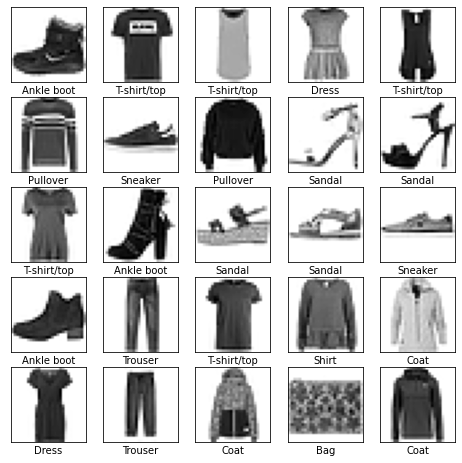

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

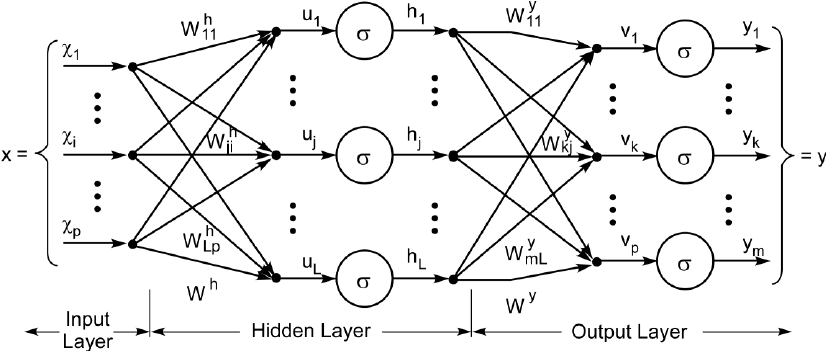

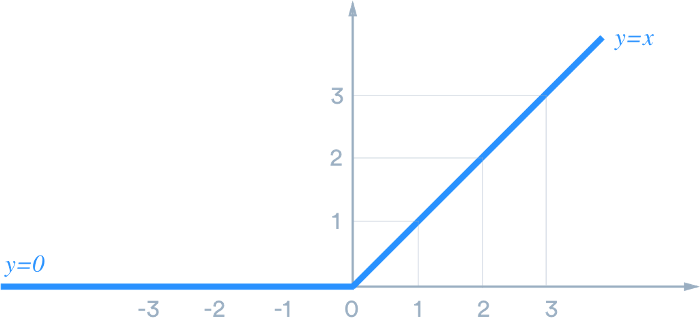

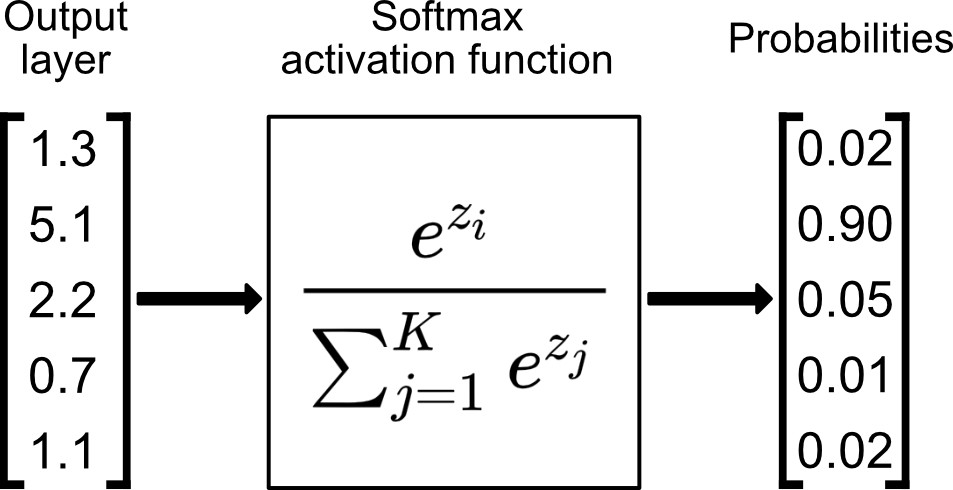

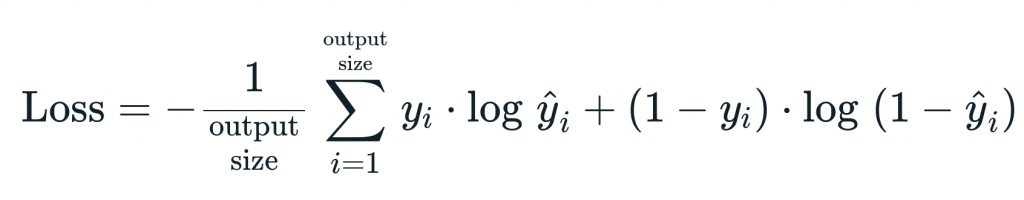

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4452 - accuracy: 0.8523
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4484 - accuracy: 0.8506
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4417 - accuracy: 0.8524
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4536 - accuracy: 0.8522
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4521 - accuracy: 0.8515
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4495 - accuracy: 0.8537
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4373 - accuracy: 0.8547
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4355 - accuracy: 0.8568
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4403 - accuracy: 0.8553
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.449

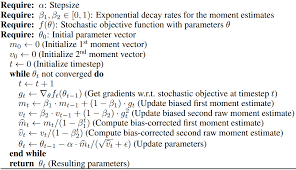

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.8266
Test accuracy: 0.8266000151634216


In [10]:
predictions = model.predict(test_images)

In [11]:
import numpy as np
print(f"predict: {np.argmax(predictions[0])}")
print(f"label:{test_labels[0]}")

predict: 9
label:9


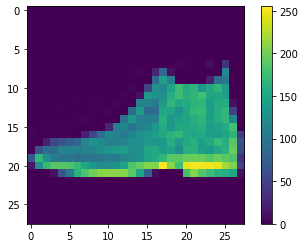

9

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
test_labels[0]

In [33]:
print(f"predict: {np.argmax(predictions[5000])}")
print(f"Actual label:{test_labels[5000]}")

predict: 2
Actual label:2


In [37]:
print(predictions[20])
np.argmax(predictions[20])


[1.6983892e-01 3.2559535e-04 3.6078209e-01 5.2155040e-02 4.8552033e-02
 4.5431920e-05 3.6664957e-01 1.5546906e-16 1.6513319e-03 4.4481211e-15]


6

In [17]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

def plot_image(i, predictions_array, true_label, img,):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
               100 * np.max(predictions_array),
               class_names[true_label]), color=color)
#------------------------------------------------------------

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


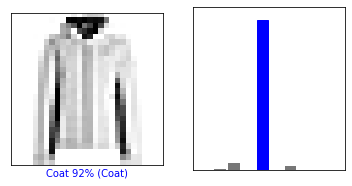

In [21]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

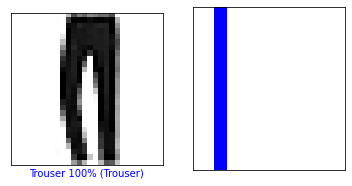

In [22]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

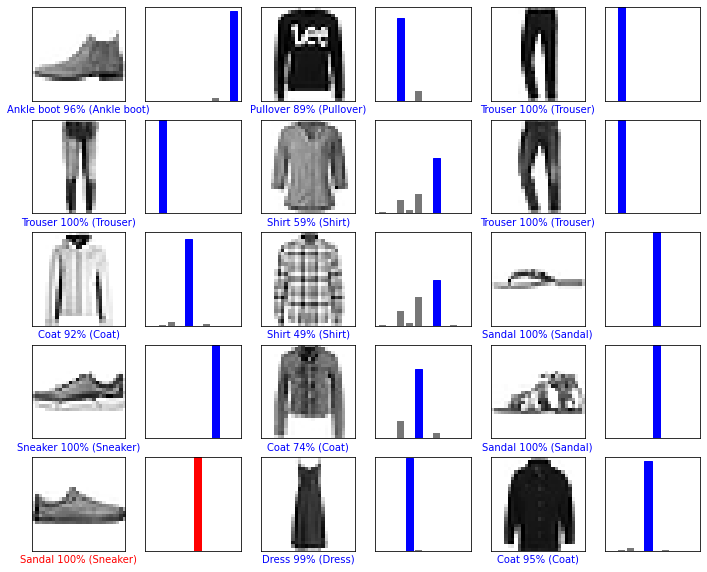

In [23]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [24]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [25]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.5847456e-01 1.9232275e-04 5.9942850e-03 2.8113290e-03 1.1922992e-03
  1.8552268e-01 1.6672863e-02 5.0595449e-03 6.1724764e-01 6.8325331e-03]]


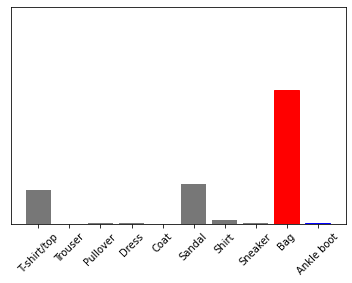

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)